In [13]:
import mysql.connector
from mysql.connector import Error

# Create a connection to MySQL
try:
    connection = mysql.connector.connect(
        host='localhost',
        database='pizzeria',
        user='root',
        password='@Mgd73423o376'
    )
    
    if connection.is_connected():
        print("Connected to MySQL Database")
    
except Error as e:
    print(f"Error while connecting to MySQL: {e}")

Connected to MySQL Database


# Project Brief
The client has several datasets about the operations of the restaurant in 10 CVS files. Those files contain data about addresses, customers, ingredients, inventory, items, orders, recipes, rotations, shifts, and staff.

The client wants me to design and build a relational database that will allow him to capture and store all of the information and data that the business generates which will help him monitor the business performance in dashboards which he also wants me to build for him later on.

# Approach
First, I had to create an entity relationship diagram (ERD) to visualize how the different datasets can be linked to each other. I used [Quick Database Diagrams](https://www.quickdatabasediagrams.com/) to preform this task. The following image shows the entity relationship diagram:
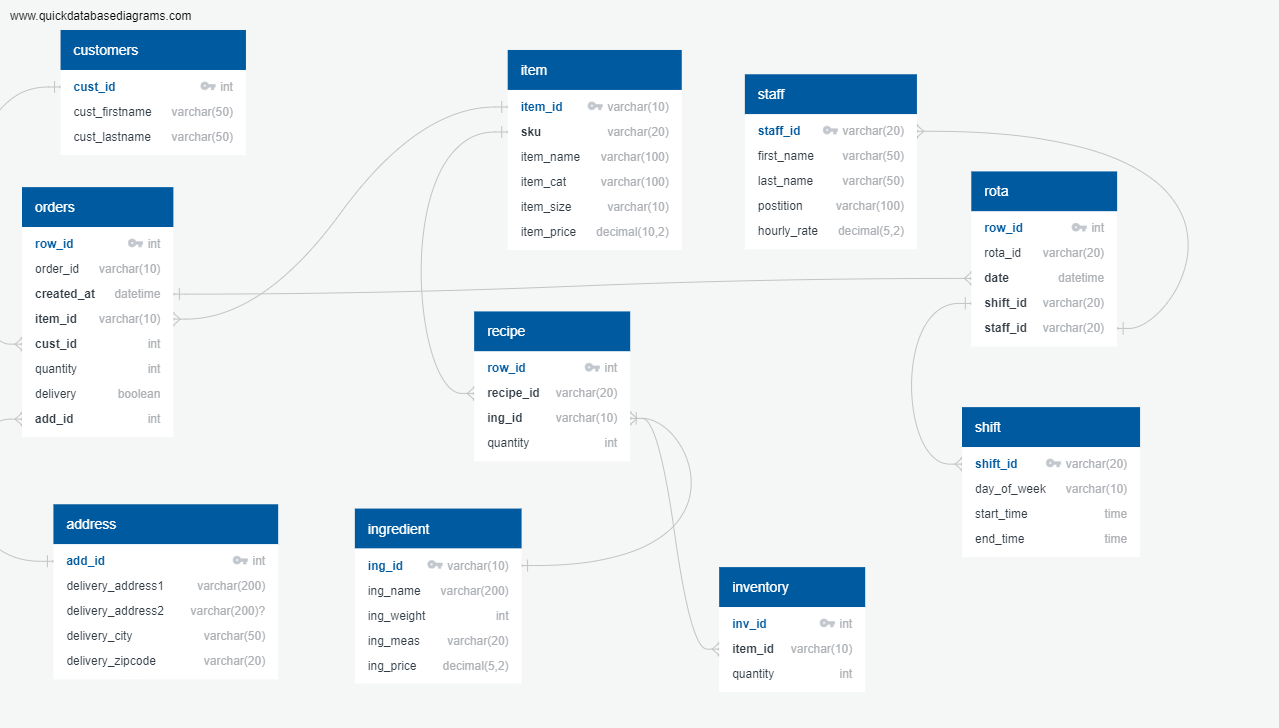

Then, I created a database in MySQL workbench and imported all of the CSV files into different tables in this database. I used the following SQL code to create the tables:

In [14]:
# Define SQL queries to create tables
create_tables_queries = """
CREATE TABLE IF NOT EXISTS orders (
    row_id int  NOT NULL ,
    order_id varchar(10)  NOT NULL ,
    created_at datetime  NOT NULL ,
    item_id varchar(10)  NOT NULL ,
    cust_id int  NOT NULL ,
    quantity int  NOT NULL ,
    delivery boolean  NOT NULL ,
    add_id int  NOT NULL ,
    PRIMARY KEY (row_id)
);

CREATE TABLE IF NOT EXISTS customers (
    cust_id int  NOT NULL ,
    cust_firstname varchar(50)  NOT NULL ,
    cust_lastname varchar(50)  NOT NULL ,
    PRIMARY KEY (cust_id)
);

CREATE TABLE IF NOT EXISTS address (
    add_id int  NOT NULL ,
    delivery_address1 varchar(200)  NOT NULL ,
    delivery_address2 varchar(200)  NULL ,
    delivery_city varchar(50)  NOT NULL ,
    delivery_zipcode varchar(20)  NOT NULL ,
    PRIMARY KEY (
        add_id
    )
);

CREATE TABLE IF NOT EXISTS item (
    item_id varchar(10)  NOT NULL ,
    sku varchar(20)  NOT NULL ,
    item_name varchar(100)  NOT NULL ,
    item_cat varchar(100)  NOT NULL ,
    item_size varchar(10)  NOT NULL ,
    item_price decimal(10,2)  NOT NULL ,
    PRIMARY KEY (
        item_id
    )
);

CREATE TABLE IF NOT EXISTS ingredient (
    ing_id varchar(10)  NOT NULL ,
    ing_name varchar(200)  NOT NULL ,
    ing_weight int  NOT NULL ,
    ing_meas varchar(20)  NOT NULL ,
    ing_price decimal(5,2)  NOT NULL ,
    PRIMARY KEY (
        ing_id
    )
);

CREATE TABLE IF NOT EXISTS recipe (
    row_id int  NOT NULL ,
    recipe_id varchar(20)  NOT NULL ,
    ing_id varchar(10)  NOT NULL ,
    quantity int  NOT NULL ,
    PRIMARY KEY (
        row_id
    )
);

CREATE TABLE IF NOT EXISTS inventory (
    inv_id int  NOT NULL ,
    item_id varchar(10)  NOT NULL ,
    quantity int  NOT NULL ,
    PRIMARY KEY (
        inv_id
    )
);

CREATE TABLE IF NOT EXISTS staff (
    staff_id varchar(20)  NOT NULL ,
    first_name varchar(50)  NOT NULL ,
    last_name varchar(50)  NOT NULL ,
    postition varchar(100)  NOT NULL ,
    hourly_rate decimal(5,2)  NOT NULL ,
    PRIMARY KEY (
        staff_id
    )
);

CREATE TABLE IF NOT EXISTS rota (
    row_id int  NOT NULL ,
    rota_id varchar(20)  NOT NULL ,
    date datetime  NOT NULL ,
    shift_id varchar(20)  NOT NULL ,
    staff_id varchar(20)  NOT NULL ,
    PRIMARY KEY (
        row_id
    )
);

CREATE TABLE IF NOT EXISTS shift (
    shift_id varchar(20)  NOT NULL ,
    day_of_week varchar(10)  NOT NULL ,
    start_time time  NOT NULL ,
    end_time time  NOT NULL ,
    PRIMARY KEY (
        shift_id
    )
);
"""

# Execute the queries
cursor = connection.cursor()
for query in create_tables_queries.split(';'):
    if query.strip():
        cursor.execute(query)
        print(f"Executed: {query}")
connection.commit()
cursor.close()

Executed: 
CREATE TABLE IF NOT EXISTS orders (
    row_id int  NOT NULL ,
    order_id varchar(10)  NOT NULL ,
    created_at datetime  NOT NULL ,
    item_id varchar(10)  NOT NULL ,
    cust_id int  NOT NULL ,
    quantity int  NOT NULL ,
    delivery boolean  NOT NULL ,
    add_id int  NOT NULL ,
    PRIMARY KEY (row_id)
)
Executed: 

CREATE TABLE IF NOT EXISTS customers (
    cust_id int  NOT NULL ,
    cust_firstname varchar(50)  NOT NULL ,
    cust_lastname varchar(50)  NOT NULL ,
    PRIMARY KEY (cust_id)
)
Executed: 

CREATE TABLE IF NOT EXISTS address (
    add_id int  NOT NULL ,
    delivery_address1 varchar(200)  NOT NULL ,
    delivery_address2 varchar(200)  NULL ,
    delivery_city varchar(50)  NOT NULL ,
    delivery_zipcode varchar(20)  NOT NULL ,
    PRIMARY KEY (
        add_id
    )
)
Executed: 

CREATE TABLE IF NOT EXISTS item (
    item_id varchar(10)  NOT NULL ,
    sku varchar(20)  NOT NULL ,
    item_name varchar(100)  NOT NULL ,
    item_cat varchar(100)  NOT NUL

True

I exported this database into “Google Cloud SQL for MySQL” and linked this database to Looker Studio.

The client would like to know the following information about the orders:
1. Total orders
2. Total sales
3. Total items
4. Average order value
5. Sales by category
6. Top selling items
7. Orders by hour
8. Sales by hour
9. Orders by address
10. Orders by delivery/pick up

To answer the clients questions about the orders activity, I created the following SQL queries:

In [20]:
from sqlalchemy import create_engine
import pandas as pd
from urllib.parse import quote_plus

# Define your MySQL database credentials
username = 'root'
password = quote_plus('@Mgd73423o376')  # URL encode the password
host = 'localhost'
database = 'pizzeria'

# Create the SQLAlchemy engine with the properly encoded password
engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}/{database}")

# Test connection (optional)
try:
    connection = engine.connect()
    print("Connected to MySQL Database")

    # Define the second SELECT query
    query = """
SELECT
 o.order_id,
 i.item_price,
 o.quantity,
 i.item_cat,
 i.item_name,
 o.created_at,
 a.delivery_address1,
 a.delivery_address2,
 a.delivery_city,
 a.delivery_zipcode,
 o.delivery 
FROM
 orders o
 LEFT JOIN item i ON o.item_id = i.item_id
 LEFT JOIN address a ON o.add_id = a.add_id
    """

    # Execute the query and fetch results into a DataFrame using the SQLAlchemy engine
    df = pd.read_sql(query, engine)
    print(df.head())

finally:
    # Close the connection
    connection.close()

Connected to MySQL Database
  order_id  item_price  quantity item_cat                     item_name  \
0      109        12.0         2    Pizza          Pizza Margherita Reg   
1      110        16.0         1    Pizza       Pizza Diavola (hot) Reg   
2      111        12.0         1    Pizza          Pizza Margherita Reg   
3      111        16.0         1    Pizza       Pizza Diavola (hot) Reg   
4      112        19.0         3    Pizza  Pizza Quattro Formaggi Large   

           created_at          delivery_address1 delivery_address2  \
0 2022-10-08 13:22:00        607 Trails End Road                     
1 2022-10-08 13:53:00         25 Cliffside Drive                     
2 2022-10-08 13:32:00            56 Concord Road                     
3 2022-10-08 13:32:00            56 Concord Road                     
4 2022-10-08 19:19:00  82 Lookout Mountain Drive                     

  delivery_city delivery_zipcode  delivery  
0    Manchester             6042         1  
1    Manch

Using Looker Studio visualization tools, I created the following [interactive orders dashboard](https://lookerstudio.google.com/reporting/3419d838-eab6-4314-90cc-1769baa59adc/page/5vp9D?s=v0xPcMhuufM) which answers all of the clients’ questions about the orders:
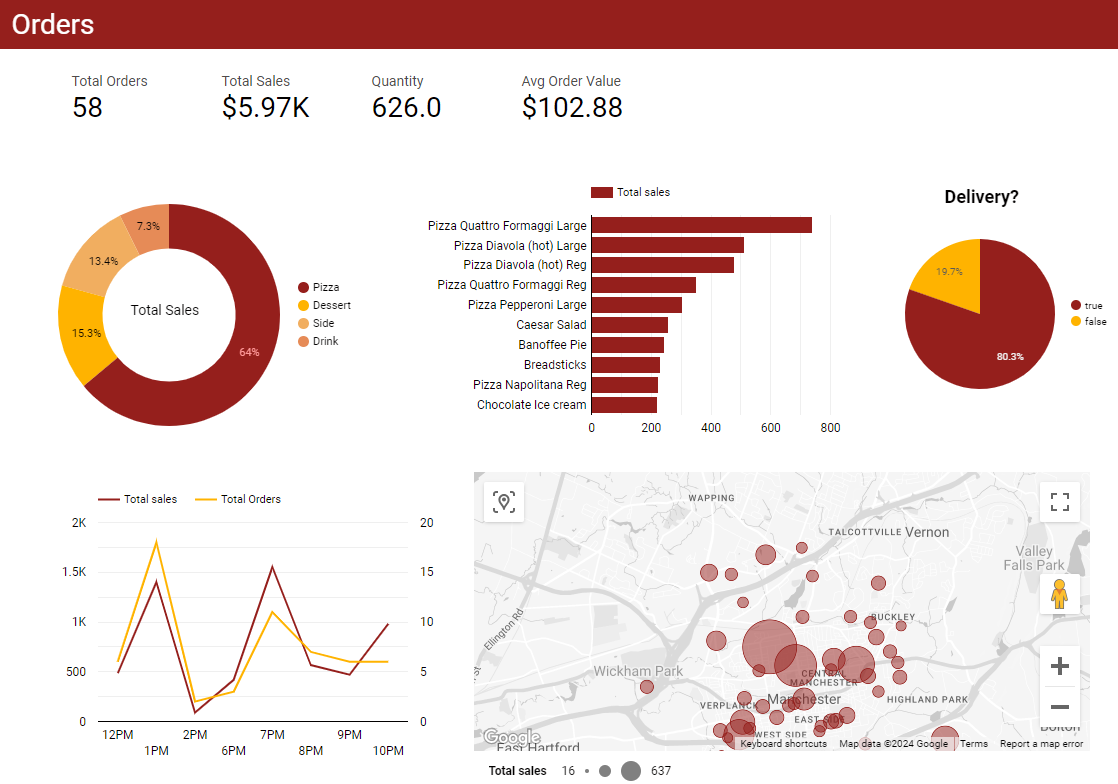

The client would like to know the following information about the inventory:
1. Total quantity by ingredient
2. Total cost of ingredients
3. Calculated cost of pizza
4. Percentage stock remaining by ingredient
5. List of ingredients to re-order based on remaining inventory

To answer the clients questions about the inventory activity, I created the following SQL sub-queries:

In [19]:
# Define the second SELECT query
query = """
SELECT
    s1.item_name AS item_name,
    s1.ing_name AS ing_name,
    s1.ing_id AS ing_id,
    s1.ing_weight AS ing_weight,
    s1.ing_price AS ing_price,
    s1.order_quantity AS order_quantity,
    s1.recipe_quantity AS recipe_quantity,
    (s1.order_quantity * s1.recipe_quantity) AS ordered_weight,
    (s1.ing_price / s1.ing_weight) AS unit_cost,
    ((s1.order_quantity * s1.recipe_quantity) * (s1.ing_price / s1.ing_weight)) AS ingredient_cost
FROM
(
    SELECT
        o.item_id AS item_id,
        i.sku AS sku,
        i.item_name AS item_name,
        r.ing_id AS ing_id,
        ing.ing_name AS ing_name,
        ing.ing_weight AS ing_weight,
        ing.ing_price AS ing_price,
        SUM(o.quantity) AS order_quantity,
        r.quantity AS recipe_quantity
    FROM
        orders o
    LEFT JOIN item i ON o.item_id = i.item_id
    LEFT JOIN recipe r ON i.sku = r.recipe_id
    LEFT JOIN ingredient ing ON r.ing_id = ing.ing_id
    GROUP BY
        o.item_id,
        i.sku,
        i.item_name,
        r.ing_id,
        ing.ing_name,
        ing.ing_weight,
        ing.ing_price,
        r.quantity
) s1
"""

# Execute the query and fetch results into a DataFrame using the SQLAlchemy engine
df = pd.read_sql(query, engine)
print(df.head())

# Finally, close the connection
connection.close()

                 item_name                   ing_name  ing_id  ing_weight  \
0     Pizza Margherita Reg              Dried oregano  ING004         500   
1     Pizza Margherita Reg          Mozzarella cheese  ING003        2500   
2     Pizza Margherita Reg              Tomato sauce   ING002        4500   
3     Pizza Margherita Reg  Pizza dough ball (8 pack)  ING001        2000   
4  Pizza Diavola (hot) Reg              Chilli pepper  ING006        1000   

   ing_price  order_quantity  recipe_quantity  ordered_weight  unit_cost  \
0       5.99            18.0                5            90.0   0.011980   
1      14.45            18.0              170          3060.0   0.005780   
2       3.89            18.0               80          1440.0   0.000864   
3       4.22            18.0              250          4500.0   0.002110   
4       6.49            30.0               10           300.0   0.006490   

   ingredient_cost  
0         1.078200  
1        17.686800  
2         1.24479

Using Looker Studio visualization tools, I created the following [interactive inventory dashboard](https://lookerstudio.google.com/reporting/3419d838-eab6-4314-90cc-1769baa59adc/page/p_lafm3mfgkd?s=u8iQGy780LQ) which answers all of the clients’ questions about the inventory:
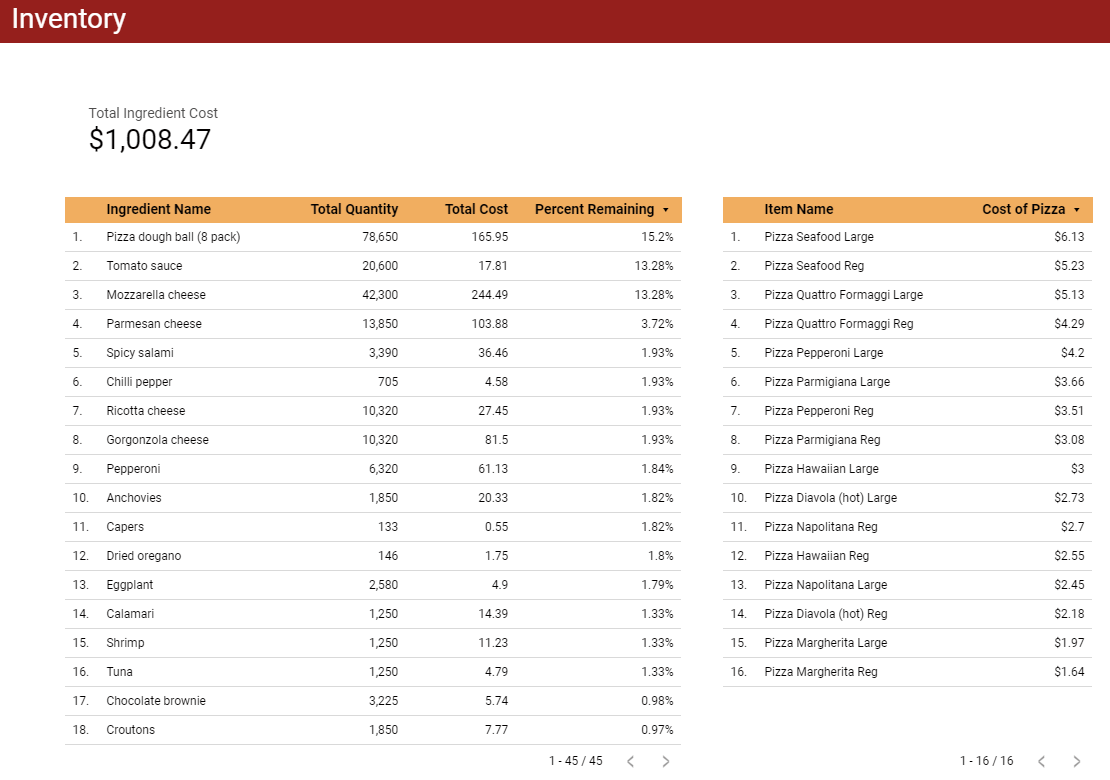

The client would like to know the following information about the staff:
1. Total staff cost
2. Total hours worked
3. Hours worked by staff member
4. Cost per staff member

To answer the clients’ questions about the staff activity, I created the following SQL queries:

In [18]:
# Define the third SELECT query
query = """
SELECT
 r.date,
 s.first_name,
 s.last_name,
 s.hourly_rate,
 sh.start_time,
 sh.end_time,
 ((
   HOUR (
   timediff( sh.end_time, sh.start_time ))* 60 
   )+(
   MINUTE (
   timediff( sh.end_time, sh.start_time ))))/ 60 AS hours_in_shift,
 ((
   HOUR (
   timediff( sh.end_time, sh.start_time ))* 60 
   )+(
   MINUTE (
   timediff( sh.end_time, sh.start_time ))))/ 60 * s.hourly_rate AS staff_cost 
FROM
 rota r
 LEFT JOIN staff s ON r.staff_id = s.staff_id
 LEFT JOIN shift sh ON r.shift_id = sh.shift_id
"""

# Execute the query and fetch results into a DataFrame using the SQLAlchemy engine
df = pd.read_sql(query, engine)
print(df.head())

# Finally, close the connection
connection.close()

        date  first_name last_name  hourly_rate      start_time  \
0 2022-10-08       Mindy     Sloan        17.25 0 days 10:30:00   
1 2022-10-08      Luqman     Cantu        21.50 0 days 10:30:00   
2 2022-10-08  Lilly-Rose    Vaughn        14.50 0 days 10:30:00   
3 2022-10-08     Desiree   Gardner        14.50 0 days 10:30:00   
4 2022-10-08       Mindy     Sloan        17.25 0 days 18:30:00   

         end_time  hours_in_shift  staff_cost  
0 0 days 14:30:00             4.0      69.000  
1 0 days 14:30:00             4.0      86.000  
2 0 days 14:30:00             4.0      58.000  
3 0 days 14:30:00             4.0      58.000  
4 0 days 23:00:00             4.5      77.625  


Using Looker Studio visualization tools, I created the following [interactive staff dashboard](https://lookerstudio.google.com/reporting/3419d838-eab6-4314-90cc-1769baa59adc/page/p_rpsiw5kgkd?s=sSPAdvsl37o) which answers all of the clients’ questions about the staff:
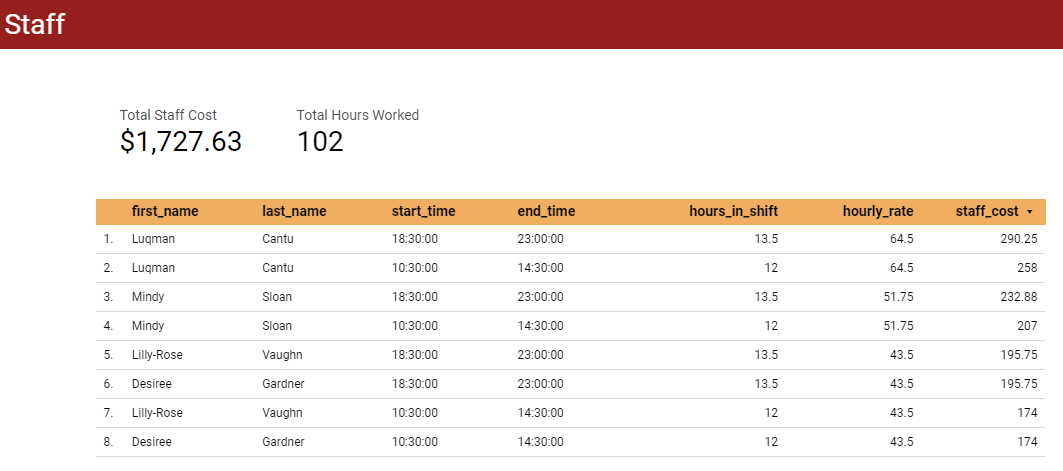